#Exp-8 : To perform image segmentation using active contour and snake model.

Name : N U Praneeth Reddy

Reg.No : 21BAI1500

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.segmentation import active_contour
from skimage.draw import circle_perimeter
from skimage.segmentation import (morphological_geodesic_active_contour,inverse_gaussian_gradient)

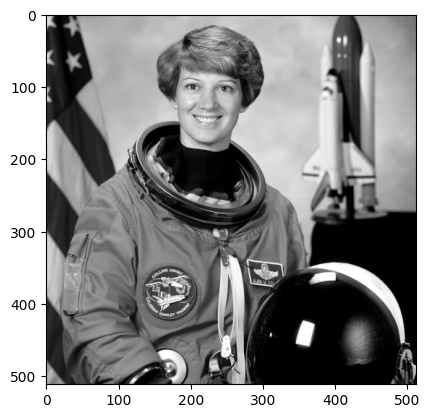

In [ ]:
img = data.astronaut()
gray_img = color.rgb2gray(img)
plt.imshow(gray_img,"gray")

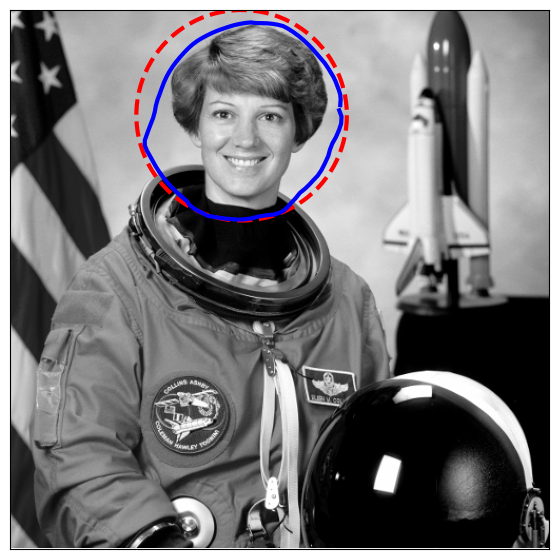

In [ ]:
r = 100  # Radius of the circle
rows, cols = gray_img.shape
theta = np.linspace(0, 2*np.pi, 100)
x = 220 + r * np.cos(theta)
y = 100 + r * np.sin(theta)
init = np.array([x, y]).T

alpha = 0.01
beta = 1.0
gamma = 0.001
coordinates = active_contour(gray_img, init, alpha=alpha, beta=beta, gamma=gamma)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(gray_img, cmap='gray')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(coordinates[:, 0], coordinates[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, gray_img.shape[1], gray_img.shape[0], 0])

plt.show()

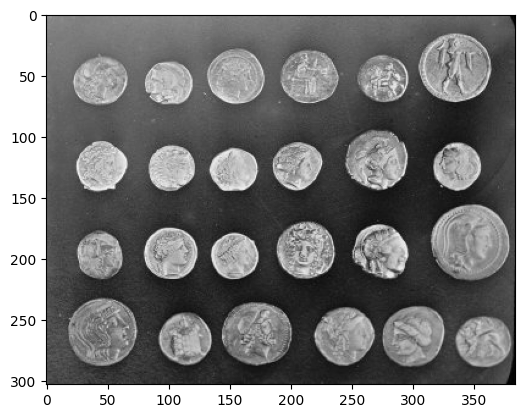

In [ ]:
# Load the coins image
img1 = data.coins()
# Display the grayscale image
plt.imshow(img1, cmap="gray")
plt.show()


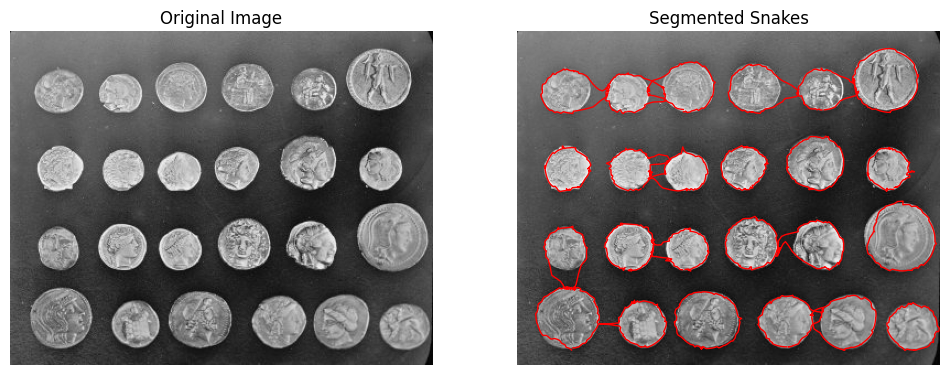

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour, inverse_gaussian_gradient

img = data.coins()
gimage = inverse_gaussian_gradient(img)
num_points = 100
radius = 30
segmented_snakes = []

for center_x, center_y in [(50, 50), (50, 100), (50, 150), (50, 225), (50,275), (45,338), (125,50), (120,105), (130,150), (120,210), (120,265), (120,345),
                           (200,45), (200,100), (195,150), (195,210), (195,265),(190,350),(255,48), (260,110), (260,170), (255,245), (260,300), (260,360) ]:
    theta = np.linspace(0, 2*np.pi, num_points)
    init_snake = np.array([center_x + radius * np.cos(theta),
                           center_y + radius * np.sin(theta)]).T

    snake = active_contour(gaussian(img, sigma=1), init_snake, alpha=0.01, beta=0.1, gamma=0.001, max_num_iter=230)
    segmented_snakes.append(snake)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for snake in segmented_snakes:
    axes[1].plot(snake[:, 1], snake[:, 0], color='red', lw=1)

axes[1].imshow(img, cmap='gray')
axes[1].set_title('Segmented Snakes')
axes[1].axis('off')

plt.show()